## **MINERAÇÃO DE DADOS - DATASET TITANIC**
**Aluna:** Ananda Mendes Souza - 19.1.4030

**Professor:** Anderson Almeida Ferreira

---



Este notebook contém todas as atividades realizadas com o conjunto de dados de treinamento do desafio "Titanic: Machine Learning from Disaster" do Kaggle (https://www.kaggle.com/c/titanic).

Está dividido em três partes: Caracterização de um conjunto de dados, Limpeza e transformação de dados e Estimando o desempenho dos classificadores.

## Caracterização de um conjunto de dados

### Importação das bibliotecas necessárias

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import minmax_scale, scale, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import model_selection, svm, metrics, cluster
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


### Importação dos dados

In [30]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Tipos de atributos

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Com base nas colunas (acima), podemos observar os seguintes tipos de atributos:

* Atributos categóricos nominais: 'Survived', 'Sex', 'Embarked', 'Cabin', 'Ticket', 'Name' 
* Atributos categóricos ordinais: 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'PassengerId'
* Atributos binários simétricos: 'Survived'
* Atributos binários assimétricos: -
* Atributos contínuos: 'Fare'
* Atributos discretos: 'Age', 'PassengerId', 'Pclass'

### Atributos numéricos

Valor médio:

In [32]:
names = ["PassengerId","Pclass", "Age", "SibSp", "Parch", "Fare"]
df[names].mean()

PassengerId    446.000000
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

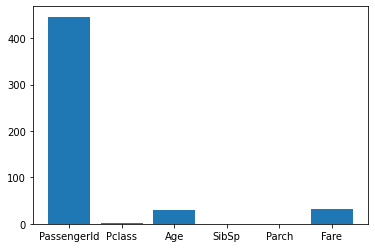

In [33]:
values = df[names].mean()
plt.bar(names, values)
plt.show()

Valor máximo:

In [34]:
df[names].max()

PassengerId    891.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

Valor mínimo:

In [35]:
df[names].min()

PassengerId    1.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

Intervalo de valores:

In [36]:
print("PassengerId:", df["PassengerId"].min(), "-", df["PassengerId"].max())
print("Pclass:", df["Pclass"].min(), "-", df["Pclass"].max())
print("SibSp:", df["SibSp"].min(), "-", df["SibSp"].max())
print("Age:", df["Age"].min(), "-", df["Age"].max())
print("Parch:", df["Parch"].min(), "-", df["Parch"].max())
print("Fare:", df["Fare"].min(), "-", df["Fare"].max())

PassengerId: 1 - 891
Pclass: 1 - 3
SibSp: 0 - 8
Age: 0.42 - 80.0
Parch: 0 - 6
Fare: 0.0 - 512.3292


Desvio-padrão:

In [37]:
df[names].std()

PassengerId    257.353842
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

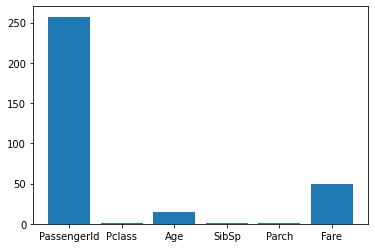

In [38]:
values = df[names].std()
plt.bar(names, values)
plt.show()

Valores aberrantes (outliers): 

In [39]:
df[names].loc[df[names].isnull().any(axis=1)]

,PassengerId,Pclass,Age,SibSp,Parch,Fare
5,6,3,NaN,0,0,8.4583
17,18,2,NaN,0,0,13.0000
19,20,3,NaN,0,0,7.2250
26,27,3,NaN,0,0,7.2250
28,29,3,NaN,0,0,7.8792
...,...,...,...,...,...,...
859,860,3,NaN,0,0,7.2292
863,864,3,NaN,8,2,69.5500
868,869,3,NaN,0,0,9.5000
878,879,3,NaN,0,0,7.8958


### Atributos binários

- 'Survived':

Valores possíveis: 0 (Morreu) e 1 (Sobreviveu)

Popularidade de cada:


In [40]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Valores ausentes, aberrantes e inconsistências

**Valores ausentes:**

In [41]:
df.loc[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Apenas os atributos de 'Age' e 'Cabin' apresentam atributos ausentes.

**Valores aberrantes:**

Abaixo, tem-se que os valores aberrantes referentes a idade ('Age') estão acima dos 60 anos:

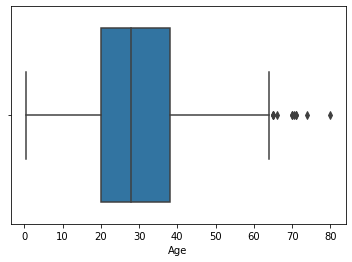

In [42]:
sns.boxplot(x=df['Age'])

Abaixo, tem-se que os valores aberrantes referentes ao preço da passagem ('Fare') estão acima de 100 mil:

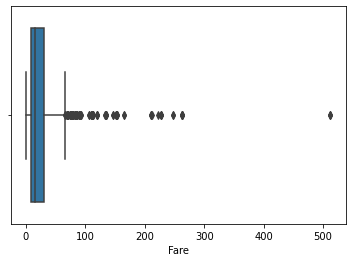

In [43]:
sns.boxplot(x=df['Fare'])

### Correlação entre os atributos

Através do método de Pearson:

In [44]:
df.corr('pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Nota-se que há correlações entre 'Pclass' e 'Fare' e 'SibSp' e 'Parch'. Em menor grau, há correlações entre 'Survived' e 'Fare' e 'SibSp' e 'Age'. Com base na tabela de correlações, podemos deduzir que quanto mais próximo de 1 maior é a correlação seja positiva ou negativa.

Como no exemplo abaixo sobre a relação de idade e sobrevivência, quanto mais velho menor é a chance dessa pessoa sobreviver:

In [45]:
df[['Age', 'Survived']].corr('pearson')

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


## Limpeza e Transformação dos dados

### Transformação, remoção de dados e Preenchimento dos valores ausentes

Antes de remover dados e preencher aqueles com valores nulos, cria-se um novo atributo chamado 'Tag' responsável pelos pronomes de tratamento que se encontram no atributo 'Name'. Além disso, considerando que alguns desses pronomes não são comuns, eles são agrupados em um único grupo ('Unusual'), enquanto outros são modificados para uma versão mais comum (por exemplo, "Mlee" pode ser substituído por "Miss").

Por fim, observa-se que os atributos referentes a 'Name' e 'PassengerId' são desnecessários, e podem ser retirados do dataset.

In [46]:
# Fazendo uma cópia para não alterar os valores originais
dfCopia = df.copy()

# Obtendo o atributo Tag
dfCopia['Tag'] = dfCopia.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupando pronomes não comuns
dfCopia['Tag'] = dfCopia['Tag'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Unusual')

# Substituindo pronomes por versões mais comuns
dfCopia['Tag'] = dfCopia['Tag'].replace('Mlle', 'Miss')
dfCopia['Tag'] = dfCopia['Tag'].replace('Ms', 'Miss')
dfCopia['Tag'] = dfCopia['Tag'].replace('Mme', 'Mrs')

# Removendo os atributos Name e PassengerId
dfCopia = dfCopia.drop(['Name'], axis=1)
dfCopia = dfCopia.drop(['PassengerId'], axis=1)

# Quantidade total de valores nulos para cada atributo
dfCopia.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Tag           0
dtype: int64

Há valores ausentes presentes no atributo 'Cabin', 'Age' e 'Embarked'. Entretanto, através do código acima, nota-se que há 687 linhas (de 891) com 'Cabin' tendo valor nulo, ou seja, aproximadamente 77% das linhas desta coluna estão nulos. Considerando, portanto, que este atributo não tem correlação com a taxa de sobreviventes, é viável retirá-lo do dataset ("drop").

Em relação aos outros atributos, entretanto, há uma porcentagem de correlação alta o suficiente que justifica mantê-los. O atributo de 'Age' é preenchido através da média das idades por faixa sendo considerado o pronome de tratamento (Miss: 0-23; Mrs,Mr e Unusual: 23-34; Master: 34-80) enquanto 'Embarked' é preenchido com o valor mais comum.

In [47]:
# Removendo os atributos Cabin e Ticket
dfCopia = dfCopia.drop(['Cabin', 'Ticket'], axis=1)

# dividindo o atributo 'Age' em 3 faixas (0-23; 23-34; 34-80)
bins = pd.qcut(dfCopia['Age'], 3)

# Neste exemplo, a coluna 'Age' sera agrupada
# pelas faixas definidas pelo metodo qcut.
grupos = dfCopia['Age'].groupby(bins)

# obtendo a media de cada faixa
medias = grupos.mean()
print (medias)

#Preenchendo os valores ausentes com a média de acordo com o pronome de tratamento
dfCopia.loc[(dfCopia['Age'].isnull()) & (dfCopia['Tag'] == 'Miss'), 'Age'] = medias[0] 
dfCopia.loc[(dfCopia['Age'].isnull()) & (dfCopia['Tag'] == 'Mrs'), 'Age'] = medias[1]
dfCopia.loc[(dfCopia['Age'].isnull()) & (dfCopia['Tag'] == 'Mr'), 'Age'] = medias[1]
dfCopia.loc[(dfCopia['Age'].isnull()) & (dfCopia['Tag'] == 'Unusual'), 'Age'] = medias[1]
dfCopia.loc[(dfCopia['Age'].isnull()) & (dfCopia['Tag'] == 'Master'), 'Age'] = medias[2]

# Substituindo os valores nulos em Embarked com o mais comum
dfCopia['Embarked'] = dfCopia['Embarked'].fillna(dfCopia.Embarked.dropna().mode()[0])

#Arredondando as idades para 1 casa decimal
dfCopia['Age'] = dfCopia['Age'].round(1)

dfCopia

Age
(0.419, 23.0]    15.155163
(23.0, 34.0]     28.525862
(34.0, 80.0]     46.012712
Name: Age, dtype: float64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tag
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Unusual
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,15.2,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


### Suavização dos ruídos

A fim de reduzir a influência de ruídos nos atributos do conjunto de dados estudado, dividi os valores de cada atributo em faixas, de modo que cada faixa contenha aproximadamente a mesma quantidade de valores. Em seguida, os valores contidos em cada faixa são substituídos pela média das idades.

Text(0, 0.5, 'Quantidade')

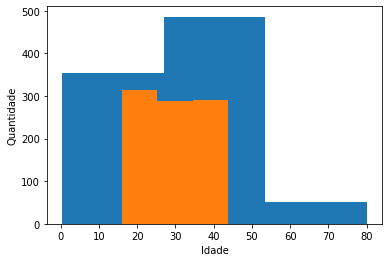

In [48]:
#gráfico em azul
plt.hist(dfCopia['Age'], bins = 3)
plt.xlabel('Idade')
plt.ylabel('Quantidade')

# dividindo o atributo 'Age' em 3 faixas 
bins = pd.qcut(dfCopia['Age'], 3)

# quantidade de valores aproximadamente igual em cada faixa 
bins.value_counts()

# Neste exemplo, a coluna 'Age' sera agrupada
# pelas faixas definidas pelo metodo qcut.
grupos = dfCopia['Age'].groupby(bins)

# obtendo a media de cada faixa
medias = grupos.mean()

# Obtendo a nova coluna.
# Neste caso, cada elemento de bins consiste 
# no intervalo que o respectivo valor de 'Age'
# pertence e, assim, a funcao informada em apply
# retornara a respectiva media de cada intervalo.
novo_age = bins.apply(lambda x : medias[x])

# a coluna 'Age' do DataFrame original é atualizada
dfCopia['Age'] = novo_age

#gráfico em laranja
plt.hist(dfCopia['Age'], bins = 3)
plt.xlabel('Idade')
plt.ylabel('Quantidade')

### Inconsistências

Os atributos que poderiam ter incosistências foram excluídos: 'Name' e 'Ticket'

### Transformação de atributos categóricos nominais em vetor numérico

Sabendo que os atributos categóricos nominais são 'Sex', 'Embarked', 'Tag', utiliza-se o conceito de Ordinal Enconding para transformá-los em vetor númerico: cada valor único passa a ter um valor numérico diferente.

In [49]:
# Conferindo os atributos categóricos
s = (dfCopia.dtypes == 'object')
categoricos = list(s[s].index)

print("Atributos categóricos:", categoricos)

# Aplicando o 'ordinal encoder' em cada coluna com atributos categóricos
oe = sklearn.preprocessing.OrdinalEncoder()

dfCopia[categoricos] = oe.fit_transform(dfCopia[categoricos])

dfCopia

Atributos categóricos: ['Sex', 'Embarked', 'Tag']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tag
0,0,3,1.0,16.034824,1,0,7.2500,2.0,2.0
1,1,1,0.0,43.755172,1,0,71.2833,0.0,3.0
2,1,3,0.0,28.239583,0,0,7.9250,2.0,1.0
3,1,1,0.0,43.755172,1,0,53.1000,2.0,3.0
4,0,3,1.0,43.755172,0,0,8.0500,2.0,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,28.239583,0,0,13.0000,2.0,4.0
887,1,1,0.0,16.034824,0,0,30.0000,2.0,1.0
888,0,3,0.0,16.034824,1,2,23.4500,2.0,1.0
889,1,1,1.0,28.239583,0,0,30.0000,0.0,2.0


### Transformação de atributos categóricos ordinais em atributos numéricos

Já os atributos categóricos ordinais apenas o  **'Pclass'**, porém o mesmo já é numérico então não há nada a fazer.

### Normalização dos valores de atributos numéricos

Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de
posição e de espalhamento/variação [Faceli et al. 2011]. Tipicamente, tais medidas irão
consistir na média e no desvio-padrão. Neste caso, o valor normalizado de um atributo j
em um objeto i é dado por:

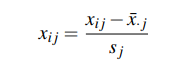

onde image.png representam a média do atributo j e o seu desvio-padrão, respectivamente.
Desse modo, cada atributo j terá média zero e desvio-padrão unitário.

In [50]:
# Obtendo os nomes das colunas do DataFrame como uma lista.
cols = list(dfCopia.columns)

#removendo as colunas que não precisam ser normalizadas  
cols.remove('Survived')
cols.remove('Pclass')
cols.remove('Sex')
cols.remove('SibSp')
cols.remove('Parch')
cols.remove('Embarked')
cols.remove('Tag')

# Copiando os dados e aplicando a normalizacao
# por padronização a todas as colunas do DataFrame.
# Por padrao, o metodo scale subtrai a media e divide pelo desvio-padrao.
dados_dist = dfCopia.copy()
dados_dist[cols] = dfCopia[cols].apply(scale)

dados_dist.round(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tag
0,0,3,1.0,-1.14,1,0,-0.50,2.0,2.0
1,1,1,0.0,1.29,1,0,0.79,0.0,3.0
2,1,3,0.0,-0.07,0,0,-0.49,2.0,1.0
3,1,1,0.0,1.29,1,0,0.42,2.0,3.0
4,0,3,1.0,1.29,0,0,-0.49,2.0,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,-0.07,0,0,-0.39,2.0,4.0
887,1,1,0.0,-1.14,0,0,-0.04,2.0,1.0
888,0,3,0.0,-1.14,1,2,-0.18,2.0,1.0
889,1,1,1.0,-0.07,0,0,-0.04,0.0,2.0


## Estimando o desempenho dos classificadores

Usando as SVM, obtenha um classificador e estimene o seu desempenho usando validação cruzada com 10 folds. Para cada conjunto de treinamento, use a técnica de Grid Search para encontrar os melhores valores de parâmetros com o Kernel RBF. Como resultado final, apresente a média e o desvio padrão das acurácias dos 10 folds de teste.

In [51]:
X = dfCopia.drop('Survived', axis=1)
y = dfCopia.Survived

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=101)

# Cria uma pipeline
pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))

# Definindo os parametros para o Grid Search
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]

# Definindo a validação cruzada de 10 folds para Grid Search
grid = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)

# Treinando o modelo
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=1,
             param_grid=[{'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                         10.0],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [52]:
# Imprime o resultado e parametro do melhor modelo encontrado
print('Best score: %.3f' % grid.best_score_)
print('Best parameters:')
print(grid.best_params_)

Best score: 0.841
Best parameters:
{'svc__C': 1.0, 'svc__gamma': 0.05, 'svc__kernel': 'rbf'}


In [53]:
# Resultados das validações cruzadas
print('Accuracy:')

# Média das acurácias dos 10 folds de teste
for i in range(10):
  print('Fold '+ str(i) + ': %.3f' % np.mean(grid.cv_results_.get('split'+str(i)+'_test_score')))

# Desvio padrão dos folds de teste
print('\n')
print('STD: %.3f' % np.mean(grid.cv_results_.get('std_test_score')))

Accuracy:
Fold 0: 0.759
Fold 1: 0.724
Fold 2: 0.707
Fold 3: 0.750
Fold 4: 0.708
Fold 5: 0.689
Fold 6: 0.756
Fold 7: 0.724
Fold 8: 0.699
Fold 9: 0.745


STD: 0.032


## Agrupamento/Segmentação


*A) crie clusters sem usar o atributo Survived e usando duas técnicas diferentes e os dados de treinamento do desafio;*


In [54]:
# Técnica de clusterização: BIRCH
# Método hierárquico que junta aglomeração com realocação

birch = cluster.Birch(branching_factor=100, n_clusters=3, compute_labels=True, copy=True)
birch.fit(X)
labelsBirch = birch.labels_

# Técnica de clusterização: KMeans
# Calcula a distância de cada objeto ao centro de cada cluster 

kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X)
labelsKMEANS = kmeans.labels_

*B) Avalie os resultados usando as métricas homogenety, completeness e V-measure usando o atributo Survived, e silhouette coefficient (avaliação intríseca);*

O Kmeans se mostrou melhor.

In [55]:
print('HOMOGENETY')
print('Birch: %.3f' % metrics.homogeneity_score(y, labelsBirch))
print('Kmeans: %.3f' % metrics.homogeneity_score(y, labelsKMEANS))

print('\nCOMPLETENESS')
print('Birch: %.3f' % metrics.completeness_score(y, labelsBirch))
print('Kmeans: %.3f' % metrics.completeness_score(y, labelsKMEANS))

print('\nV-MEASURE')
print('Birch: %.3f' % metrics.v_measure_score(y, labelsBirch))
print('Kmeans: %.3f' % metrics.v_measure_score(y, labelsKMEANS))

print('\nSILHOUETTE COEFFICIENT')
print('Birch: %.3f' % metrics.silhouette_score(dfCopia, labelsBirch))
print('Kmeans: %.3f' % metrics.silhouette_score(dfCopia, labelsKMEANS))

HOMOGENETY
Birch: 0.026
Kmeans: 0.056

COMPLETENESS
Birch: 0.072
Kmeans: 0.055

V-MEASURE
Birch: 0.038
Kmeans: 0.056

SILHOUETTE COEFFICIENT
Birch: 0.779
Kmeans: 0.618


### Referências

*   https://edisciplinas.usp.br/pluginfile.php/4052836/mod_resource/content/4/mineracaodadosbiologicos-parte3.pdf

*   https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

*   https://builtin.com/data-science/data-clustering-python


